# Grow Banana then Burn

In [1]:
from osgeo import gdal
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import ogr, osr
import shapefile as shp
import pandas as pd

- Tubbs Fire (Santa Rosa) Landscape 

In [18]:
fire = gpd.read_file('Tubbs Fire Satellite Data/ca_tubbs_20171010_2344_dd83.shp')

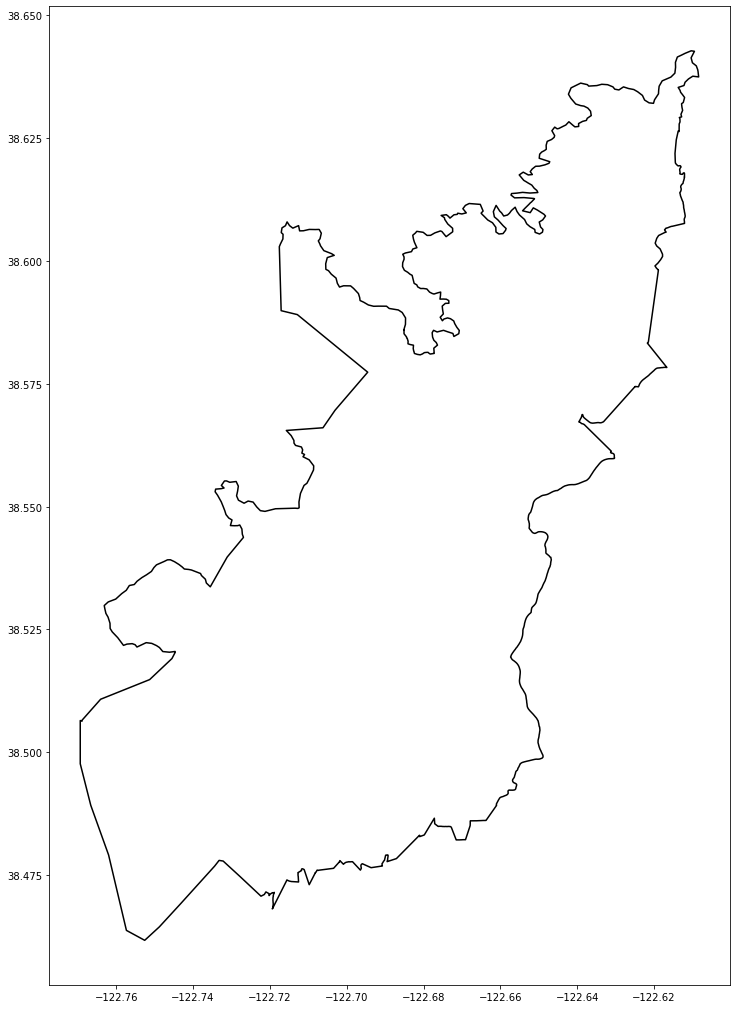

In [19]:
fig, ax2 = plt.subplots(figsize=(30,18))
fire.boundary.plot(edgecolor='black', ax=ax2)
#fire.boundary.plo_t()
fig.savefig('tubbs_2344.jpg')

In [2]:
adapterbility_map = gdal.Open('adaptability map/bananna_with_soil_future_2050.tif')

In [3]:
adapt_map = adapterbility_map.GetRasterBand(1).ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

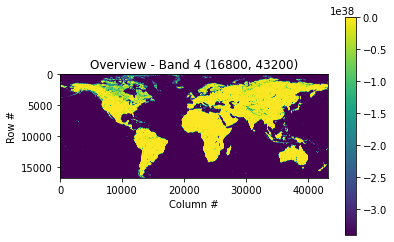

In [16]:
plot_raster(adapt_map)

In [15]:
shp_path = "CA_Counties/CA_Counties_TIGER2016.shp"
sf = shp.Reader(shp_path)

In [18]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [21]:
df = read_shapefile(sf)
df.shape

(58, 18)

In [22]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [24]:
CA_counties = gpd.read_file(shp_path, encoding='utf-8')

In [30]:
CA_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081437574,497508807,+38.5251824,-122.9261095,"POLYGON ((-13685069.767 4623872.832, -13685073..."
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,25260,None,A,3598583450,5468555,+36.0724780,-119.8155301,"POLYGON ((-13353767.857 4335831.239, -13353767..."
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,"POLYGON ((-13073075.796 3919158.524, -13074423..."
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644333049,246486852,+39.0620323,-120.7227181,"POLYGON ((-13476944.153 4722608.150, -13476936..."


In [31]:
Sonoma = CA_counties[CA_counties.NAME == 'Sonoma']

In [32]:
Sonoma

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081437574,497508807,+38.5251824,-122.9261095,"POLYGON ((-13685069.767 4623872.832, -13685073..."


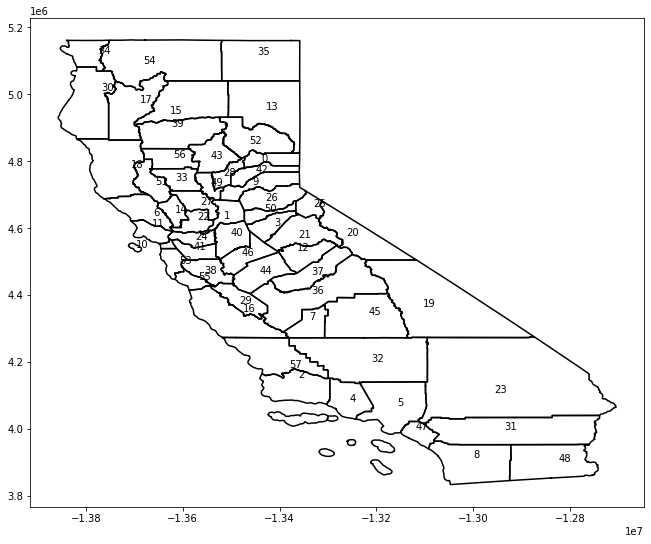

In [23]:
plot_map(sf)

In [6]:
adapterbility_map.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [2]:
# Open the Landfire landscape file using gdal
ds = gdal.Open('landscape_lcp/Landscape_1.lcp')

In [3]:
# The total number of rasters (layers) from the landscape file
ds.RasterCount

8

In [4]:
# Get geoSpatial projection Information
ds.GetProjectionRef()

'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [5]:
# The meta data for the whole landscape
ds.GetMetadata()

{'DESCRIPTION': '', 'LATITUDE': '38', 'LINEAR_UNIT': 'Meters'}

In [6]:
# get raster georeference info
ds.GetGeoTransform()

(-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)

In [7]:
# Get metadata for raster 4
ds.GetRasterBand(4).GetMetadata()

{'FUEL_MODEL_FILE': 'D:\\scratch\\dist\\lf16285728\\us_200lcp40\\output\\rastert_fuel1.txt',
 'FUEL_MODEL_MAX': '202',
 'FUEL_MODEL_MIN': '91',
 'FUEL_MODEL_NUM_CLASSES': '27',
 'FUEL_MODEL_OPTION': '0',
 'FUEL_MODEL_OPTION_DESC': 'no custom models AND no conversion file needed',
 'FUEL_MODEL_VALUES': '91,93,98,99,101,102,103,121,122,141,142,145,147,161,162,163,165,181,182,183,184,185,186,187,188,189,202',
 'STATISTICS_MAXIMUM': '202',
 'STATISTICS_MEAN': '134.81863926835',
 'STATISTICS_MINIMUM': '91',
 'STATISTICS_STDDEV': '37.212480000173',
 'STATISTICS_VALID_PERCENT': '100'}

In [8]:
# Get layer 4 where specifies the Fuel Model
# Fuel Model classifies the pixel area burnability
fuel_model_raster = np.array(ds.GetRasterBand(4).ReadAsArray())

In [4]:
# Fuel Model Raster Displat function
def plot_raster(raster):
    plt.imshow(raster)
    plt.colorbar()
    plt.title('Overview - Band 4 {}'.format(raster.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')

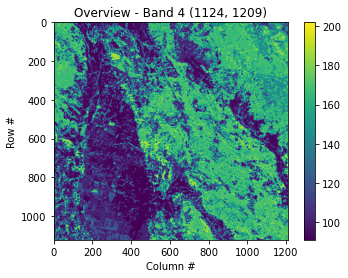

In [10]:
plot_raster(fuel_model_raster)

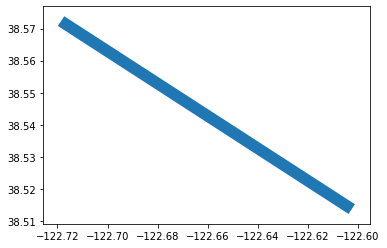

In [11]:
# 200 meters wide buffer created in ArcMAP beforehand
buffer_200 = gpd.read_file("200_buffer/TL2_200_buffer.shp")
buffer_200.plot()

- Changing the buffer

In [14]:
def zonal_buffer(rasters, buffer, target_value):
    #Open landscape raster data which is lcp
    rasters = gdal.Open(rasters)
    
    #Open buffer data that is a shape file
    driver = ogr.GetDriverByName('ESRI Shapefile')
    shp = driver.Open(buffer)
    lyr = shp.GetLayer()
    
    # get raster georeference info
    transform = rasters.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]
    
    # reproject geometry to same projection as raster
    sourceSR = lyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(rasters.GetProjectionRef())
    coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
    feat = lyr.GetNextFeature()
    geom = feat.GetGeometryRef()
    geom.Transform(coordTrans)
    
    # Get extent of geometry
    ring = geom.GetGeometryRef(0)
    numpoints = ring.GetPointCount()
    pointsX = []; pointsY = []
    for p in range(numpoints):
            lon, lat, z = ring.GetPoint(p)
            pointsX.append(lon)
            pointsY.append(lat)
    xmin = min(pointsX)
    xmax = max(pointsX)
    ymin = min(pointsY)
    ymax = max(pointsY)
   
    # Specify offset and rows and columns to read
    xoff = int((xmin - xOrigin)/pixelWidth)
    yoff = int((yOrigin - ymax)/pixelWidth)
    xcount = int((xmax - xmin)/pixelWidth)+1
    ycount = int((ymax - ymin)/pixelWidth)+1
    
    # get the fuel model
    banddataraster = rasters.GetRasterBand(4).ReadAsArray().astype(np.float)
    
    # create memory target raster
    target_ds = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
    target_ds.SetGeoTransform(transform)
    
    # create for target raster the same projection as for the value raster
    raster_srs = osr.SpatialReference()
    raster_srs.ImportFromWkt(rasters.GetProjectionRef())
    target_ds.SetProjection(raster_srs.ExportToWkt())
    # rasterize zone polygon to raster
    gdal.RasterizeLayer(target_ds, [1], lyr, burn_values=[1])
    
    # read raster as arrays
    banddataraster = rasters.GetRasterBand(4)
    dataraster = banddataraster.ReadAsArray()

    bandmask = target_ds.GetRasterBand(1)
    datamask = bandmask.ReadAsArray()
    
    #show the layer
    dataraster[datamask>0] = target_value

    plot_raster(dataraster)
    
    return dataraster

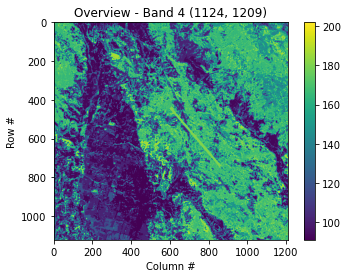

In [15]:
banana_buffer_fm = zonal_buffer('landscape_lcp/Landscape_1.lcp', "200_buffer/TL2_200_buffer.shp", 181)

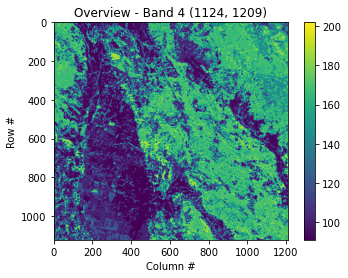

In [16]:
# Get the Fuel Model display again for comparison
plot_raster(fuel_model_raster)

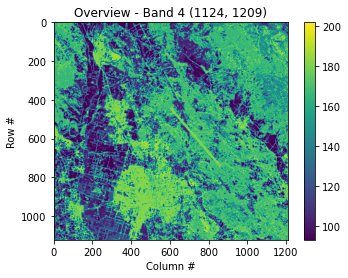

In [17]:
# NB1(urban area) == 91, TL2 == 182(TL2 is a new fuel type)
banana_buffer_fm[banana_buffer_fm == 91] = 182
plot_raster(banana_buffer_fm)

- Creating the new landscape file after modification

In [67]:
mem_drv = gdal.GetDriverByName('MEM')
lcp_drv = gdal.GetDriverByName('LCP')

In [68]:
src_ds = mem_drv.Create('/vsimem2/', banana_buffer_fm.shape[1], banana_buffer_fm.shape[0], ds.RasterCount, gdal.GDT_Int16)

In [69]:
# Read in all the rasters
for i in range(8):
    #data = [random.randint(0, 100) for i in range(myarray.size)]
    array = ds.GetRasterBand(i+1).ReadAsArray()
    src_ds.GetRasterBand(i+1).WriteRaster(0, 0, array.shape[1], array.shape[0], array.tobytes())

In [70]:
# Read in the modification fuel model raster
src_ds.GetRasterBand(4).WriteRaster(0, 0, banana_buffer_fm.shape[1], banana_buffer_fm.shape[0], banana_buffer_fm.tobytes())

# Other information
co = ['LATITUDE=38', 'LINEAR_UNIT=METER', "ELEVATION_UNIT=METERS", "SLOPE_UNIT=DEGREES", "ASPECT_UNIT=AZIMUTH_DEGREES",
      "CANOPY_COV_UNIT = Categories (0-4)", "CANOPY_HT_UNIT_NAME=Meters x 10", "CBH_UNIT_NAME=Meters x 10", "CBD_UNIT_NAME=kg/m^3 x 100"]
out_name = "200_buffer/buffer_TL2_landscape/presentation.lcp"
lcp_ds = lcp_drv.CreateCopy(out_name, src_ds, False, co)
print("SUCCESS: " + out_name)

SUCCESS: 200_buffer/buffer_TL2_landscape/presentation.lcp
